In [4]:
import pandas as pd

# Daten einlesen
# Destatis Ausländerstatistik 12521-0021 
# ACHTUNG: Ländergruppierungen_Label 'insgesamt' sind die korrekten Werte. Die Ländergruppierungen überschneiden sich.
url = "https://raw.githubusercontent.com/Antonijatzele/DSI_Abschlussprojekt/refs/heads/main/Daten/Destatis_Ausl%C3%A4nderstatistik_12521-0021_aufbereitet.csv"
df = pd.read_csv(url)


In [13]:
# Überblick
df.head()
#print(df.info())
#print(df.describe(include='all'))

,Stichtag,Bundesland,Geschlecht,Ländergruppierungen_Code,Ländergruppierungen_Label,Anzahl,Ausländer
0,2024-12-31,Sachsen,männlich,EUROPA-EG-12,EG-12 (bis 31.12.1994),12355,Ausländer
1,2024-12-31,Saarland,männlich,AFRIKASUED,Südafrika,50,Ausländer
2,2024-12-31,Hamburg,weiblich,AFRIKA,Afrika,14335,Ausländer
3,2024-12-31,Bremen,weiblich,AMERIKASUD,Südamerika,985,Ausländer
4,2024-12-31,Mecklenburg-Vorpommern,männlich,DRITT-EU-25,Drittstaaten zu EU-25 (bis 31.12.2006),50995,Ausländer


In [1]:
# Anzahl Ausländer nach Bundesland
# df.groupby("Bundesland")["Anzahl"].sum().sort_values(ascending=False)

In [2]:
# Ausländer nach Ländergruppe
#df.groupby("Ländergruppierungen_Label")["Anzahl"].sum().sort_values(ascending=False)

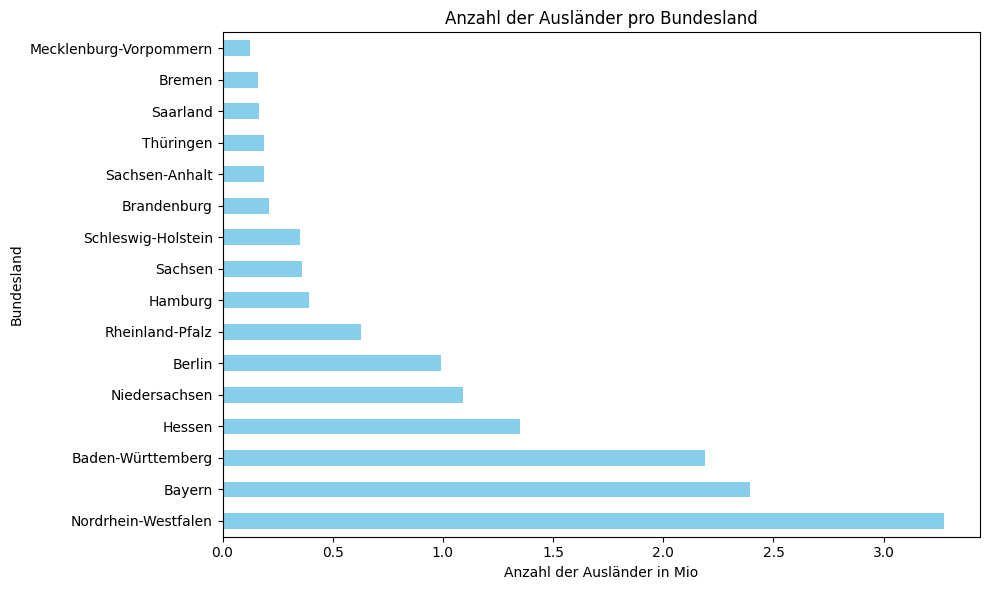

In [15]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Filtere nach 'Ländergruppierungen_Code' == 'Insgesamt' 
df_filtered = df[df['Ländergruppierungen_Label'] == 'Insgesamt']

# Gruppiere nach Bundesland und summiere die Anzahl der 'Ausländer'
bundesland_summe = df_filtered.groupby('Bundesland')['Anzahl'].sum()

# Sortiere die Summe absteigend
bundesland_summe_sorted = bundesland_summe.sort_values(ascending=False)

# Plot erstellen
plt.figure(figsize=(10, 6))

# Balkendiagramm erstellen
ax = bundesland_summe_sorted.plot(kind="barh", color="skyblue")

# Achsentitel anpassen
plt.title("Anzahl der Ausländer pro Bundesland")
plt.xlabel("Anzahl der Ausländer in Mio")
plt.ylabel("Bundesland")

# Achsenformatierung anpassen (x-Achse in Millionen)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}'))

# Layout anpassen und anzeigen
plt.tight_layout()
plt.show()


In [ ]:
# Aus welchen Ländergruppierungen kommen die meisten Migranten?